<a href="https://colab.research.google.com/github/JesseSchwartz25/cvis-spring2021/blob/main/Color_identifier_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
import spacy

In [ ]:
# Split data into training and testing
# build the model to identify colors
# run model and verify
# need to output: top color, strongest colors
# write report




In [ ]:
#Jesse

In [ ]:
# Michael
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage.io as io
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
%matplotlib inline

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')

'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n"

In [ ]:
### First define get_image to pull an image and convert to BGR2RGB
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

image = get_image('34.jpeg')

error: ignored

In [ ]:
## Extract the hex value
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
plt.imshow(image)

NameError: ignored

In [ ]:
###The function get_colors 1st reshaping the image
### Using KMeans, it creates clusters of all the colors 
### Goes through each pixel to determine what the color is
### Using some distance metrix we calculate the distance between all the points and the colors that are close and we choose the amount of groups
### For this example we use 4 (get_colors(img, 4, True))

### Math behind it we need to look into more 

def get_colors(image, number_of_colors, show_chart = True):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
  
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)

  center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
  return rgb_colors

In [ ]:
col = get_colors(image, 4, True)
col

NameError: ignored

In [ ]:
x = col[0]
y = col[3]

NameError: ignored

In [ ]:
### 

index=["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)
colors = ['blue','black', 'gray', 'green_color_wheel_x11_green', 'orange_color_wheel','pink', 'purple_html_css', 'red', 'white', 'yellow', 'brown_traditional']
color_data = csv[csv.color.isin(colors)]
color_data = color_data.reset_index(drop = True)
color_data

FileNotFoundError: ignored

In [ ]:
###takes R,G,B values and intregating over the length of the cvs file and subtracting by each RGB value to find the color closest to our orginal RBG
### Find the closet corresponding color in the cvs file

def recognize_color_all(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [ ]:
### Looks at the filter data (color_data)
def recognize_color(R,G,B):
    minimum = 10000
    for i in range(len(color_data)):
        d = abs(R- int(color_data.loc[i,"R"])) + abs(G- int(color_data.loc[i,"G"]))+ abs(B- int(color_data.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = color_data.loc[i,"color_name"]
    return cname

In [ ]:
recognize_color(x[0], x[1], x[2])

In [ ]:
recognize_color_all(x[0],x[1], x[2])

In [ ]:
recognize_color_all(y[0],y[1], y[2])

In [ ]:
recognize_color(y[0],y[1], y[2])

In [ ]:
def create_blank(width, height, rgb_color=(0, 0, 0)):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((height, width, 3), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color

    return image

In [ ]:
width, height = 300, 300

x1 = (y[0], y[1], y[2])
image = create_blank(width, height, rgb_color=x1)
plt.imshow(image)
y

In [ ]:
# Colleen
### I want to go through all the pixels and get rid of all the colors that do not correspond with the color dataset 
### 



test
we got here
black


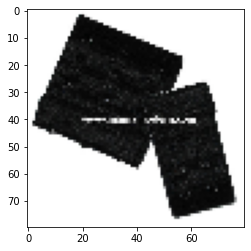

In [ ]:
# testing importing the NN i 'made'
import matplotlib.pyplot as plt



class MyNet(nn.Module):  # subclass nn.Module
    def __init__(self):
        print('test')
        super(MyNet, self).__init__()
        
        # We need 3 fully-connected layers!
        # Simply assigning them as attributes will
        # make sure that PyTorch keeps track of them.
        
        # 8 => 32
        self.fc1 = nn.Linear(19200, 120)
        # 32 => 32
        self.fc2 = nn.Linear(120, 32)
        # 32 => 8
        self.fc3 = nn.Linear(32, 11)

        print('we got here')
        
        
    # We also need to define a `forward()` method that details
    # what should happen when this module is used.
    def forward(self, x):
        x = self.fc1(x)
        x = x.relu()
        x = self.fc2(x)
        x = x.relu()
        return self.fc3(x)

net = MyNet()
net.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/net.py'))
net.eval()


filepath = "/content/drive/MyDrive/Colab Notebooks/CSCFP/"


# loading in all data
# in our case: google 512 dataset, edited and compiled by Michael
# length reduced to 400 for training. needed for the tensor to work.
trainlength = 400
black = np.load(filepath + "black_data.npy")
black = torch.as_tensor(black)

plt.imshow(black[0,0])

img = black[0,0]
img = img.flatten()
img = img/255

result = net(img)

# print(result)



max = 0

for i in range(10):
  if(result[i + 1] > result[max]):
    # print(result[i+1],'>', result[max])
    max = i+1
data_names = ['black', 'blue', 'brown', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']

print(data_names[max])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')